RとStanで始めるベイズ統計モデリングによるデータ分析入門，実践編第2章をpython環境で実行する。

# パッケージのインポート

In [1]:
import pystan
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Meiryo'

# データの前処理

## データの読み込み

In [2]:
# 分析対象のデータ
df = pd.read_csv('00_Data/3-2-1-beer-sales-2.csv')
df.head(n=3)

,sales,temperature
0,41.68,13.7
1,110.99,24.0
2,65.32,21.5


# 散布図による可視化

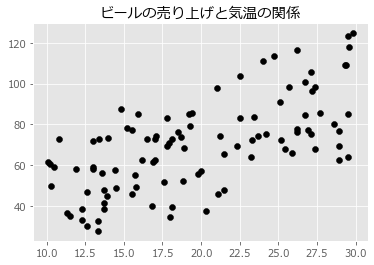

In [3]:
# 図時
plt.figure()
plt.scatter(x=df['temperature'], y=df['sales'],color='black')
plt.title('ビールの売り上げと気温の関係')
plt.show()

# stanファイルの実装

stanファイルの中身は以下の通り

data{

    int N;                   # サンプルサイズ
    vector[N] sales;         # 売り上げデータ
    vectorr[N] temperature;  # 気温データ
    
}

parameters{

    real Intercept;          # 切片
    real beta;               # 係数
    real<lower=0> sigma;     # 標準偏差
    
}

model{

    # 平均　Intercept + beta*temperature
    # 標準偏差sigmaの正規分布に従ってデータが得られたと仮定
    for(i in 1:N){
        sales[i] ~ normal(Intercept + beta*temperatur[i], sigma);
    }
    
}


# データの取りまとめ

In [4]:
# サンプルサイズ
N = len(df)
# ビールの売り上げ
sales = df.sales
# 気温
temperature = df.temperature

# ディクショナリ形式にまとめる
data ={'N': N,
       'sales': sales,
       'temperature': temperature} 

# MCMCの実行

In [5]:
# 乱数の生成
mcmc_result = pystan.stan(file='01_stan/3-2-1-simple-lm.stan',
                          data=data,
                          seed=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_75accf505028bba5572c105072f99a10 NOW.


## 結果

In [6]:
print(mcmc_result)

Inference for Stan model: anon_model_75accf505028bba5572c105072f99a10.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Intercept  21.52    0.15   5.89  10.02  17.58  21.56  25.37  33.28   1529    1.0
beta        2.44  7.2e-3   0.28   1.88   2.26   2.44   2.64   3.01   1537    1.0
sigma      17.07    0.03   1.22  14.84  16.24   17.0  17.82   19.7   1948    1.0
lp__      -330.1    0.03    1.2 -333.2 -330.6 -329.8 -329.2 -328.7   1310    1.0

Samples were drawn using NUTS at Sat Jul 11 16:27:13 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


## MCMCサンプルの抽出

In [11]:
mcmc_sample  = mcmc_result.extract()

# 事後分布の可視化

In [17]:
mcmc_sample

OrderedDict([('Intercept',
              array([15.81067925,  9.33181186, 29.96891114, ..., 13.68114742,
                     19.16975086, 23.71798771])),
             ('beta',
              array([2.58205218, 2.87549914, 2.13096552, ..., 2.7492859 , 2.64948755,
                     2.41045107])),
             ('sigma',
              array([15.9837072 , 16.70859638, 17.09301963, ..., 17.10891857,
                     18.30070546, 17.0805016 ])),
             ('lp__',
              array([-330.64183194, -332.0263637 , -330.2145832 , ..., -329.69260405,
                     -330.00609418, -329.10703759]))])